

```
# THIS IS ONE OF THE BEST EVER CODE FOR {DY/DX= -Y}. CODE IS NOT MINE BUT LOGIC IS MINE. YOU DON'T NEED TO WRITE THE CODE WHAT ONE HAS TO DO IS TO IS TO BUILD LOGIC FOR THE PROBLEM AND USE AN AI TO WRITE CODE FOR YOURSELF.
```



In [ ]:
# this is one of the test for the ode projEct on ode solving

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1)
  ])
  return model

def ode(t, y):
  return -y


In [ ]:
def loss_function(model, t):
  with tf.GradientTape() as tape:
    tape.watch(t)
    y = model(t)
    dy_dt = tape.gradient(y, t)

    ode_physics = dy_dt + y
    mse = tf.reduce_mean(tf.square(ode_physics))

    # Add initial condition constraint
    initial_condition = tf.square(model(tf.constant([[0.0]])) - 1.0)

  return mse + initial_condition



@tf.function
def train_step(model, optimizer, t):
  with tf.GradientTape() as tape:
    loss = loss_function(model, t)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss



In [ ]:
def solve_ode():
  model = create_model()
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  t = tf.linspace(0., 5., 200)
  t = tf.reshape(t, (-1, 1))

  epochs = 10000
  for epoch in range(epochs):
    loss = train_step(model, optimizer, t)
    if epoch % 500 == 0:
      print(f"Epoch {epoch}, Loss: {loss.numpy().item():.6f}")

  # Plot results
  y_pred = model(t)
  y_true = np.exp(-t.numpy())

  plt.figure(figsize=(10, 6))
  plt.plot(t, y_pred, 'r', label='Predicted')
  plt.plot(t, y_true, 'b--', label='True')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.legend()
  plt.title('ODE Solution: dy/dt = -y, y(0) = 1')
  plt.show()

  # Calculate and print mean squared error
  mse = np.mean((y_pred.numpy().flatten() - y_true.flatten())**2)
  print(f"Mean Squared Error: {mse:.6f}")


Epoch 0, Loss: 1.298090
Epoch 500, Loss: 0.000139
Epoch 1000, Loss: 0.000050
Epoch 1500, Loss: 0.000030
Epoch 2000, Loss: 0.000019
Epoch 2500, Loss: 0.000012
Epoch 3000, Loss: 0.000022
Epoch 3500, Loss: 0.000006
Epoch 4000, Loss: 0.000004
Epoch 4500, Loss: 0.000002
Epoch 5000, Loss: 0.000003
Epoch 5500, Loss: 0.000001
Epoch 6000, Loss: 0.000001
Epoch 6500, Loss: 0.000001
Epoch 7000, Loss: 0.000001
Epoch 7500, Loss: 0.000001
Epoch 8000, Loss: 0.000003
Epoch 8500, Loss: 0.000000
Epoch 9000, Loss: 0.000000
Epoch 9500, Loss: 0.000001


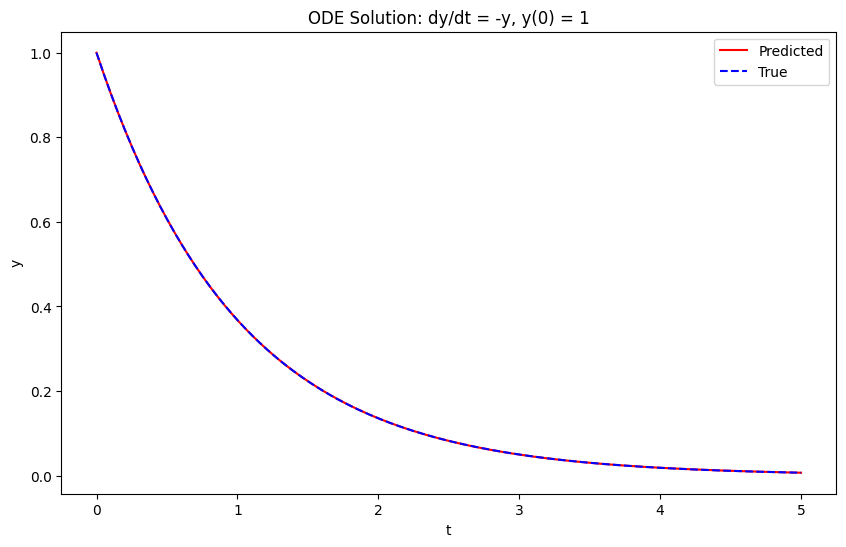

Mean Squared Error: 0.000000


In [ ]:
solve_ode()



```
Model is overfitting the data. But we can't help with it as we don't have test data and it will always fit and predict for infinte unknown points in future so it is a good PINN model and is useful in many ways to predict the solution and we will not get the equation for the solution but can get a value of $y$ for a given value of $x$ and it is only thing which one need in a geometrical mathematics.
```

